In [70]:
from taxi import TaxiEnv
import numpy as np
#create a single game instance
env = TaxiEnv()

#start new game
env.reset();

In [71]:
# display the game state
env.render()


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [72]:
print("initial observation code:", env.reset())
print('printing observation:')
env.render()
print("observations:", env.observation_space, 'n=', env.observation_space.n)
print("actions:", env.action_space, 'n=', env.action_space.n)

initial observation code: 289
printing observation:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

observations: Discrete(500) n= 500
actions: Discrete(6) n= 6


In [73]:
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)
print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)
print("printing new state:")
env.render()

taking action 2 (right)
new observation code: 289
reward: -1
is game over?: False
printing new state:
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)


### Baseline: random search

### Policy

* The environment has a 4x4 grid of states (16 total), they are indexed from 0 to 15
* From each states there are 4 actions (left,down,right,up), indexed from 0 to 3

We need to define agent's policy of picking actions given states. Since we have only 16 disttinct states and 4 actions, we can just store the action for each state in an array.

This basically means that any array of 16 integers from 0 to 3 makes a policy.

In [74]:
import numpy as np
n_states = env.observation_space.n
n_actions = env.action_space.n
def get_random_policy():
    """
    Build a numpy array representing agent policy.
    This array must have one element per each of 16 environment states.
    Element must be an integer from 0 to 3, representing action
    to take from that state.
    """
    return np.random.randint(0, n_actions, n_states)

### Let's evaluate!
* Implement a simple function that runs one game and returns the total reward

In [75]:
def sample_reward(env, policy, t_max=200):
    """
    Interact with an environment, return sum of all rewards.
    If game doesn't end on t_max (e.g. agent walks into a wall), 
    force end the game and return whatever reward you got so far.
    Tip: see signature of env.step(...) method above.
    """
    s = env.reset()
    total_reward = 0

    for ind in range(t_max):
        action = policy[s]
        s, reward, is_done, _ = env.step(action)
        total_reward += reward
        if (is_done):
            break
    return total_reward

In [76]:
def evaluate(policy, n_times=100):
    """Run several evaluations and average the score the policy gets."""
    rewards = []
    for _ in range(n_times):
        rewards.append(sample_reward(env, policy))
    return float(np.mean(np.array(rewards)))      

# Part II Genetic algorithm 

The next task is to devise some more effecient way to perform policy search.
We'll do that with a bare-bones evolutionary algorithm.
[unless you're feeling masochistic and wish to do something entirely different which is bonus points if it works]

In [77]:
def crossover(policy1, policy2, p=0.5):
    """
    for each state, with probability p take action from policy1, else policy2
    """
    cross_policy = []
    
    return np.choose(np.random.choice(np.array([0, 1]), 
                     size = policy1.shape, 
                     p = [p, 1-p]),
                     choices=[policy1, policy2])

In [78]:
def mutation(policy, p=0.1):
    """
    for each state, with probability p replace action with random action
    Tip: mutation can be written as crossover with random policy
    """
#     <your code>
    return crossover(get_random_policy(), policy, p)
    

In [79]:
n_epochs = 100 #how many cycles to make
pool_size = 100 #how many policies to maintain
n_crossovers = 50 #how many crossovers to make on each step
n_mutations = 50 #how many mutations to make on each tick

In [80]:
print("initializing...")
pool = [get_random_policy() for _ in range(pool_size)]
pool_scores = [sample_reward(env, policy) for policy in pool]


initializing...


In [81]:
assert type(pool) == type(pool_scores) == list
assert len(pool) == len(pool_scores) == pool_size
assert all([type(score) in (float, int) for score in pool_scores])


In [82]:
from random import choice
from tqdm import tqdm

In [84]:
epoch_scores = []

hello


In [85]:
from matplotlib import pylab as plt
import pandas as pd
%matplotlib inline

In [86]:
file = pd.DataFrame(columns=["epochs", "pool_size", "cross", "mut", "score", "isdone", "steps_num", "policy"])    

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Epoch 0:
best score: -774.47


  1%|▊                                                                               | 1/100 [00:51<1:25:32, 51.84s/it]

Epoch 1:
best score: -828.56


  2%|█▌                                                                              | 2/100 [01:41<1:23:40, 51.23s/it]

Epoch 2:
best score: -773.93


  3%|██▍                                                                             | 3/100 [02:51<1:31:37, 56.68s/it]

Epoch 3:
best score: -738.29


  4%|███▏                                                                            | 4/100 [03:40<1:27:09, 54.48s/it]

Epoch 4:
best score: -810.11


  5%|████                                                                            | 5/100 [04:29<1:23:51, 52.96s/it]

Epoch 5:
best score: -774.47


  6%|████▊                                                                           | 6/100 [05:19<1:21:27, 52.00s/it]

Epoch 6:
best score: -702.56


  7%|█████▌                                                                          | 7/100 [06:12<1:20:59, 52.25s/it]

Epoch 7:
best score: -720.56


  8%|██████▍                                                                         | 8/100 [07:03<1:19:33, 51.88s/it]

Epoch 8:
best score: -649.01


  9%|███████▏                                                                        | 9/100 [07:54<1:18:06, 51.51s/it]

Epoch 9:
best score: -630.29


 10%|███████▉                                                                       | 10/100 [08:46<1:17:36, 51.74s/it]

Epoch 10:
best score: -577.01


 11%|████████▋                                                                      | 11/100 [09:45<1:20:12, 54.07s/it]

Epoch 11:
best score: -666.56


 12%|█████████▍                                                                     | 12/100 [10:44<1:21:22, 55.48s/it]

Epoch 12:
best score: -647.93


 13%|██████████▎                                                                    | 13/100 [11:39<1:20:10, 55.29s/it]

Epoch 13:
best score: -667.37


 14%|███████████                                                                    | 14/100 [12:33<1:18:39, 54.88s/it]

Epoch 14:
best score: -577.1


 15%|███████████▊                                                                   | 15/100 [13:33<1:20:06, 56.55s/it]

Epoch 15:
best score: -541.64


 16%|████████████▋                                                                  | 16/100 [14:28<1:18:33, 56.11s/it]

Epoch 16:
best score: -575.75


 17%|█████████████▍                                                                 | 17/100 [15:20<1:15:43, 54.75s/it]

Epoch 17:
best score: -577.28


 18%|██████████████▏                                                                | 18/100 [16:19<1:16:37, 56.07s/it]

Epoch 18:
best score: -576.2


 19%|███████████████                                                                | 19/100 [17:14<1:15:03, 55.59s/it]

Epoch 19:
best score: -612.47


 20%|███████████████▊                                                               | 20/100 [18:11<1:14:49, 56.12s/it]

Epoch 20:
best score: -523.19


 21%|████████████████▌                                                              | 21/100 [19:11<1:15:15, 57.16s/it]

Epoch 21:
best score: -522.65


 22%|█████████████████▍                                                             | 22/100 [20:06<1:13:38, 56.65s/it]

Epoch 22:
best score: -559.19


 23%|██████████████████▏                                                            | 23/100 [21:05<1:13:40, 57.40s/it]

Epoch 23:
best score: -523.1


 24%|██████████████████▉                                                            | 24/100 [21:59<1:11:31, 56.47s/it]

Epoch 24:
best score: -505.01


 25%|███████████████████▊                                                           | 25/100 [23:04<1:13:39, 58.93s/it]

Epoch 25:
best score: -505.28


 26%|████████████████████▌                                                          | 26/100 [24:02<1:12:25, 58.73s/it]

Epoch 26:
best score: -486.56


 27%|█████████████████████▎                                                         | 27/100 [24:58<1:10:11, 57.69s/it]

Epoch 27:
best score: -469.55


 28%|██████████████████████                                                         | 28/100 [25:59<1:10:34, 58.82s/it]

Epoch 28:
best score: -487.1


 29%|██████████████████████▉                                                        | 29/100 [27:01<1:10:40, 59.72s/it]

Epoch 29:
best score: -487.19


 30%|███████████████████████▋                                                       | 30/100 [27:56<1:07:59, 58.28s/it]

Epoch 30:
best score: -487.37


 31%|████████████████████████▍                                                      | 31/100 [28:49<1:05:23, 56.86s/it]

Epoch 31:
best score: -451.82


 32%|█████████████████████████▎                                                     | 32/100 [29:44<1:03:31, 56.06s/it]

Epoch 32:
best score: -451.28


 33%|██████████████████████████                                                     | 33/100 [30:38<1:02:03, 55.58s/it]

Epoch 33:
best score: -469.46


 34%|██████████████████████████▊                                                    | 34/100 [31:33<1:00:53, 55.36s/it]

Epoch 34:
best score: -451.37


 35%|████████████████████████████▎                                                    | 35/100 [32:28<59:59, 55.38s/it]

Epoch 35:
best score: -379.82


 36%|█████████████████████████████▏                                                   | 36/100 [33:22<58:40, 55.01s/it]

Epoch 36:
best score: -433.55


 37%|█████████████████████████████▉                                                   | 37/100 [34:16<57:11, 54.47s/it]

Epoch 37:
best score: -361.64


 38%|██████████████████████████████▊                                                  | 38/100 [35:11<56:35, 54.76s/it]

Epoch 38:
best score: -397.46


 39%|███████████████████████████████▌                                                 | 39/100 [36:06<55:38, 54.73s/it]

Epoch 39:
best score: -379.82


 40%|████████████████████████████████▍                                                | 40/100 [37:00<54:29, 54.49s/it]

Epoch 40:
best score: -379.64


 41%|█████████████████████████████████▏                                               | 41/100 [37:54<53:30, 54.42s/it]

Epoch 41:
best score: -379.82


 42%|██████████████████████████████████                                               | 42/100 [38:50<53:13, 55.05s/it]

Epoch 42:
best score: -361.37


 43%|██████████████████████████████████▊                                              | 43/100 [39:45<52:15, 55.02s/it]

Epoch 43:
best score: -343.91


 44%|███████████████████████████████████▋                                             | 44/100 [40:40<51:09, 54.82s/it]

Epoch 44:
best score: -325.91


 45%|████████████████████████████████████▍                                            | 45/100 [41:33<49:55, 54.47s/it]

Epoch 45:
best score: -343.91


 46%|█████████████████████████████████████▎                                           | 46/100 [42:28<48:59, 54.44s/it]

Epoch 46:
best score: -361.82


 47%|██████████████████████████████████████                                           | 47/100 [43:22<48:01, 54.37s/it]

Epoch 47:
best score: -343.82


 48%|██████████████████████████████████████▉                                          | 48/100 [44:16<47:09, 54.41s/it]

Epoch 48:
best score: -379.55


 49%|███████████████████████████████████████▋                                         | 49/100 [45:10<46:04, 54.21s/it]

Epoch 49:
best score: -325.91


 50%|████████████████████████████████████████▌                                        | 50/100 [46:06<45:32, 54.65s/it]

Epoch 50:
best score: -289.91


 51%|█████████████████████████████████████████▎                                       | 51/100 [47:00<44:32, 54.53s/it]

Epoch 51:
best score: -290.0


 52%|██████████████████████████████████████████                                       | 52/100 [47:54<43:26, 54.31s/it]

Epoch 52:
best score: -289.82


 53%|██████████████████████████████████████████▉                                      | 53/100 [48:47<42:18, 54.01s/it]

Epoch 53:
best score: -307.91


 54%|███████████████████████████████████████████▋                                     | 54/100 [49:42<41:36, 54.28s/it]

Epoch 54:
best score: -271.73


 55%|████████████████████████████████████████████▌                                    | 55/100 [50:36<40:36, 54.14s/it]

Epoch 55:
best score: -289.82


 56%|█████████████████████████████████████████████▎                                   | 56/100 [51:29<39:31, 53.91s/it]

Epoch 56:
best score: -325.82


 57%|██████████████████████████████████████████████▏                                  | 57/100 [52:23<38:39, 53.93s/it]

Epoch 57:
best score: -325.91


 58%|██████████████████████████████████████████████▉                                  | 58/100 [53:18<37:51, 54.08s/it]

Epoch 58:
best score: -271.46


 59%|███████████████████████████████████████████████▊                                 | 59/100 [54:12<36:55, 54.05s/it]

Epoch 59:
best score: -290.0


 60%|████████████████████████████████████████████████▌                                | 60/100 [55:06<36:03, 54.10s/it]

Epoch 60:
best score: -271.91


 61%|█████████████████████████████████████████████████▍                               | 61/100 [56:00<35:12, 54.18s/it]

Epoch 61:
best score: -325.64


 62%|██████████████████████████████████████████████████▏                              | 62/100 [56:55<34:23, 54.29s/it]

Epoch 62:
best score: -289.91


 63%|███████████████████████████████████████████████████                              | 63/100 [57:49<33:22, 54.14s/it]

Epoch 63:
best score: -289.19


 64%|███████████████████████████████████████████████████▊                             | 64/100 [58:43<32:32, 54.23s/it]

Epoch 64:
best score: -235.37


 65%|████████████████████████████████████████████████████▋                            | 65/100 [59:36<31:28, 53.96s/it]

Epoch 65:
best score: -253.82


 66%|████████████████████████████████████████████████████▏                          | 66/100 [1:00:29<30:20, 53.54s/it]

Epoch 66:
best score: -307.55


 67%|████████████████████████████████████████████████████▉                          | 67/100 [1:01:23<29:30, 53.66s/it]

Epoch 67:
best score: -253.91


 68%|█████████████████████████████████████████████████████▋                         | 68/100 [1:02:18<28:51, 54.09s/it]

Epoch 68:
best score: -253.82


 69%|██████████████████████████████████████████████████████▌                        | 69/100 [1:03:13<28:02, 54.27s/it]

Epoch 69:
best score: -271.64


 70%|███████████████████████████████████████████████████████▎                       | 70/100 [1:04:07<27:12, 54.42s/it]

Epoch 70:
best score: -253.73


 71%|████████████████████████████████████████████████████████                       | 71/100 [1:05:01<26:08, 54.07s/it]

Epoch 71:
best score: -253.91


 72%|████████████████████████████████████████████████████████▉                      | 72/100 [1:05:55<25:14, 54.09s/it]

Epoch 72:
best score: -236.0


 73%|█████████████████████████████████████████████████████████▋                     | 73/100 [1:06:51<24:34, 54.61s/it]

Epoch 73:
best score: -253.91


 74%|██████████████████████████████████████████████████████████▍                    | 74/100 [1:07:45<23:36, 54.47s/it]

Epoch 74:
best score: -254.0


 75%|███████████████████████████████████████████████████████████▎                   | 75/100 [1:08:39<22:38, 54.35s/it]

Epoch 75:
best score: -235.91


 76%|████████████████████████████████████████████████████████████                   | 76/100 [1:09:33<21:42, 54.26s/it]

Epoch 76:
best score: -200.0


 77%|████████████████████████████████████████████████████████████▊                  | 77/100 [1:10:27<20:49, 54.32s/it]

Epoch 77:
best score: -235.91


 78%|█████████████████████████████████████████████████████████████▌                 | 78/100 [1:11:21<19:52, 54.21s/it]

Epoch 78:
best score: -200.0


 79%|██████████████████████████████████████████████████████████████▍                | 79/100 [1:12:16<18:57, 54.18s/it]

Epoch 79:
best score: -218.0


 80%|███████████████████████████████████████████████████████████████▏               | 80/100 [1:13:09<18:01, 54.06s/it]

Epoch 80:
best score: -218.0


 81%|███████████████████████████████████████████████████████████████▉               | 81/100 [1:14:02<16:59, 53.65s/it]

Epoch 81:
best score: -217.73


 82%|████████████████████████████████████████████████████████████████▊              | 82/100 [1:14:56<16:09, 53.89s/it]

Epoch 82:
best score: -235.64


 83%|█████████████████████████████████████████████████████████████████▌             | 83/100 [1:15:52<15:22, 54.27s/it]

Epoch 83:
best score: -236.0


 84%|██████████████████████████████████████████████████████████████████▎            | 84/100 [1:16:46<14:28, 54.29s/it]

Epoch 84:
best score: -218.0


 85%|███████████████████████████████████████████████████████████████████▏           | 85/100 [1:17:39<13:30, 54.04s/it]

Epoch 85:
best score: -235.91


 86%|███████████████████████████████████████████████████████████████████▉           | 86/100 [1:18:34<12:37, 54.09s/it]

Epoch 86:
best score: -200.0


 87%|████████████████████████████████████████████████████████████████████▋          | 87/100 [1:19:28<11:43, 54.15s/it]

Epoch 87:
best score: -218.0


 88%|█████████████████████████████████████████████████████████████████████▌         | 88/100 [1:20:23<10:52, 54.41s/it]

Epoch 88:
best score: -218.0


 89%|██████████████████████████████████████████████████████████████████████▎        | 89/100 [1:21:18<10:00, 54.62s/it]

Epoch 89:
best score: -200.0


 90%|███████████████████████████████████████████████████████████████████████        | 90/100 [1:22:12<09:05, 54.56s/it]

Epoch 90:
best score: -218.0


 91%|███████████████████████████████████████████████████████████████████████▉       | 91/100 [1:23:07<08:10, 54.46s/it]

Epoch 91:
best score: -200.0


 92%|████████████████████████████████████████████████████████████████████████▋      | 92/100 [1:24:01<07:16, 54.54s/it]

Epoch 92:
best score: -200.0


 93%|█████████████████████████████████████████████████████████████████████████▍     | 93/100 [1:24:57<06:23, 54.74s/it]

Epoch 93:
best score: -200.0


 94%|██████████████████████████████████████████████████████████████████████████▎    | 94/100 [1:25:51<05:27, 54.53s/it]

Epoch 94:
best score: -200.0


 95%|███████████████████████████████████████████████████████████████████████████    | 95/100 [1:26:46<04:33, 54.74s/it]

Epoch 95:
best score: -200.0


 96%|███████████████████████████████████████████████████████████████████████████▊   | 96/100 [1:27:40<03:38, 54.63s/it]

Epoch 96:
best score: -200.0


 97%|████████████████████████████████████████████████████████████████████████████▋  | 97/100 [1:28:35<02:44, 54.67s/it]

Epoch 97:
best score: -200.0


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 98/100 [1:29:30<01:49, 54.63s/it]

Epoch 98:
best score: -200.0


 99%|██████████████████████████████████████████████████████████████████████████████▏| 99/100 [1:30:24<00:54, 54.55s/it]

Epoch 99:
best score: -200.0


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [1:31:19<00:00, 54.60s/it]


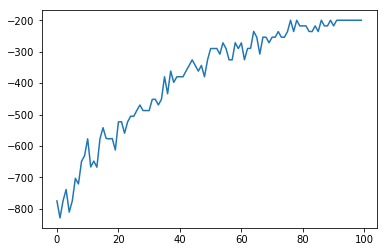

In [87]:
#main loop
for epoch in tqdm(range(n_epochs)):
    print("Epoch %s:"%epoch)
    
    crossovered = [crossover(choice(pool), choice(pool)) 
                   for _ in range(n_crossovers)]
#     <crossover random guys from pool, n_crossovers total>
    mutated = [mutation(crossovered[choice(range(len(crossovered)))]) for _ in range(n_mutations)]
#     <add several new policies at random, n_mutations total>
    assert type(crossovered) == type(mutated) == list
    
    #add new policies to the pool
    pool = pool + crossovered + mutated
#     pool = <add up old population with crossovers/mutations>
    pool_scores = [evaluate(policy) for policy in pool]
#     pool_scores = <evaluate all policies again>

#select pool_size best policies
    selected_indices = np.argsort(pool_scores)[-pool_size:]
    pool = [pool[i] for i in selected_indices]
    pool_scores = [pool_scores[i] for i in selected_indices]

    #print the best policy so far (last in ascending score order)
    print("best score:", pool_scores[-1])
    epoch_scores.append(pool_scores[-1])

plt.plot(range(len(epoch_scores)), epoch_scores)
first_best_policy = pool[-1]
s = env.reset()
total_reward = 0
step_num = 0
for ind in range(100):
    action = first_best_policy[s]
    s, reward, is_done, _ = env.step(action)
    total_reward += reward
    if (is_done):
        break
    step_num += 1 
file = file.append(pd.Series({"epochs":n_epochs, "pool_size":pool_size, "cross":n_crossovers, "mut":n_mutations, 
                              "score":pool_scores[-1], "isdone":is_done, "steps_num":step_num, "policy":pool[-1]}), 
                           ignore_index=True )
file.head()
file.to_csv("results.csv")

#### Видно, что такси понимает, что если ему стоять на месте или просто ходить, не подбирая пассажира, то оно получит наибольшую награду, так что придётся поменять систему, по которой такси плучает награду

In [94]:
from taxi_upgraded import TaxiEnv

In [95]:
env = TaxiEnv()

In [99]:
env.reset()
print(env.render())

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

None


In [88]:
def sample_reward(env, policy, t_max=200):
    """
    Interact with an environment, return sum of all rewards.
    If game doesn't end on t_max (e.g. agent walks into a wall), 
    force end the game and return whatever reward you got so far.
    Tip: see signature of env.step(...) method above.
    """
    s = env.reset()
    total_reward = 0

    for ind in range(t_max):
        action = policy[s]
        s, reward, is_done, _ = env.step(action)
        total_reward += reward
        if (is_done):
            break
    return total_reward

In [89]:
def evaluate(policy, n_times=100, t_max=200):
    """Run several evaluations and average the score the policy gets."""
    rewards = []
    for _ in range(n_times):
        rewards.append(sample_reward(env, policy, t_max))
    return float(np.mean(np.array(rewards)))      

In [90]:
print("initializing...")
pool = [get_random_policy() for _ in range(pool_size)]
pool_scores = [sample_reward(env, policy) for policy in pool]


initializing...


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Epoch 0:
best score: -902.792


  1%|▊                                                                              | 1/100 [02:15<3:44:19, 135.96s/it]

Epoch 1:
best score: -867.728


  2%|█▌                                                                             | 2/100 [04:31<3:41:38, 135.70s/it]

Epoch 2:
best score: -853.292


  3%|██▎                                                                            | 3/100 [06:45<3:38:44, 135.30s/it]

Epoch 3:
best score: -881.732


  4%|███▏                                                                           | 4/100 [09:02<3:37:25, 135.89s/it]

Epoch 4:
best score: -810.128


  5%|███▉                                                                           | 5/100 [11:21<3:36:33, 136.77s/it]

Epoch 5:
best score: -796.088


  6%|████▋                                                                          | 6/100 [13:36<3:33:28, 136.26s/it]

Epoch 6:
best score: -723.764


  7%|█████▌                                                                         | 7/100 [15:54<3:31:48, 136.65s/it]

Epoch 7:
best score: -774.632


  8%|██████▎                                                                        | 8/100 [18:10<3:29:21, 136.54s/it]

Epoch 8:
best score: -766.82


  9%|███████                                                                        | 9/100 [20:26<3:26:57, 136.45s/it]

Epoch 9:
best score: -723.8


 10%|███████▊                                                                      | 10/100 [22:44<3:25:07, 136.75s/it]

Epoch 10:
best score: -695.108


 11%|████████▌                                                                     | 11/100 [24:59<3:22:12, 136.32s/it]

Epoch 11:
best score: -688.34


 12%|█████████▎                                                                    | 12/100 [27:15<3:19:57, 136.33s/it]

Epoch 12:
best score: -616.196


 13%|██████████▏                                                                   | 13/100 [29:31<3:17:14, 136.03s/it]

Epoch 13:
best score: -637.652


 14%|██████████▉                                                                   | 14/100 [31:45<3:14:18, 135.57s/it]

Epoch 14:
best score: -588.044


 15%|███████████▋                                                                  | 15/100 [34:01<3:12:03, 135.56s/it]

Epoch 15:
best score: -644.996


 16%|████████████▍                                                                 | 16/100 [36:19<3:10:53, 136.35s/it]

Epoch 16:
best score: -623.936


 17%|█████████████▎                                                                | 17/100 [38:35<3:08:28, 136.25s/it]

Epoch 17:
best score: -594.596


 18%|██████████████                                                                | 18/100 [40:50<3:05:52, 136.00s/it]

Epoch 18:
best score: -515.036


 19%|██████████████▊                                                               | 19/100 [43:08<3:04:05, 136.37s/it]

Epoch 19:
best score: -573.536


 20%|███████████████▌                                                              | 20/100 [45:25<3:02:19, 136.75s/it]

Epoch 20:
best score: -580.412


 21%|████████████████▍                                                             | 21/100 [47:39<2:58:45, 135.77s/it]

Epoch 21:
best score: -545.06


 22%|█████████████████▏                                                            | 22/100 [49:55<2:56:53, 136.07s/it]

Epoch 22:
best score: -573.788


 23%|█████████████████▉                                                            | 23/100 [52:14<2:55:32, 136.78s/it]

Epoch 23:
best score: -501.608


 24%|██████████████████▋                                                           | 24/100 [54:31<2:53:23, 136.89s/it]

Epoch 24:
best score: -515.936


 25%|███████████████████▌                                                          | 25/100 [56:50<2:52:03, 137.64s/it]

Epoch 25:
best score: -465.608


 26%|████████████████████▎                                                         | 26/100 [59:10<2:50:26, 138.20s/it]

Epoch 26:
best score: -487.208


 27%|████████████████████▌                                                       | 27/100 [1:01:27<2:47:38, 137.79s/it]

Epoch 27:
best score: -386.876


 28%|█████████████████████▎                                                      | 28/100 [1:03:44<2:45:10, 137.65s/it]

Epoch 28:
best score: -480.368


 29%|██████████████████████                                                      | 29/100 [1:06:03<2:43:26, 138.12s/it]

Epoch 29:
best score: -451.028


 30%|██████████████████████▊                                                     | 30/100 [1:08:21<2:40:58, 137.98s/it]

Epoch 30:
best score: -437.168


 31%|███████████████████████▌                                                    | 31/100 [1:10:37<2:37:57, 137.35s/it]

Epoch 31:
best score: -350.912


 32%|████████████████████████▎                                                   | 32/100 [1:12:56<2:36:07, 137.76s/it]

Epoch 32:
best score: -393.932


 33%|█████████████████████████                                                   | 33/100 [1:15:13<2:33:41, 137.64s/it]

Epoch 33:
best score: -379.676


 34%|█████████████████████████▊                                                  | 34/100 [1:17:30<2:31:15, 137.51s/it]

Epoch 34:
best score: -408.188


 35%|██████████████████████████▌                                                 | 35/100 [1:19:49<2:29:17, 137.80s/it]

Epoch 35:
best score: -343.82


 36%|███████████████████████████▎                                                | 36/100 [1:22:07<2:27:17, 138.08s/it]

Epoch 36:
best score: -386.768


 37%|████████████████████████████                                                | 37/100 [1:24:31<2:26:40, 139.70s/it]

Epoch 37:
best score: -307.856


 38%|████████████████████████████▉                                               | 38/100 [1:26:50<2:24:09, 139.50s/it]

Epoch 38:
best score: -307.64


 39%|█████████████████████████████▋                                              | 39/100 [1:29:07<2:21:06, 138.79s/it]

Epoch 39:
best score: -322.256


 40%|██████████████████████████████▍                                             | 40/100 [1:31:38<2:22:36, 142.61s/it]

Epoch 40:
best score: -358.256


 41%|███████████████████████████████▏                                            | 41/100 [1:33:58<2:19:22, 141.74s/it]

Epoch 41:
best score: -315.2


 42%|███████████████████████████████▉                                            | 42/100 [1:36:17<2:16:10, 140.88s/it]

Epoch 42:
best score: -329.06


 43%|████████████████████████████████▋                                           | 43/100 [1:38:36<2:13:23, 140.41s/it]

Epoch 43:
best score: -336.476


 44%|█████████████████████████████████▍                                          | 44/100 [1:40:58<2:11:25, 140.81s/it]

Epoch 44:
best score: -321.932


 45%|██████████████████████████████████▏                                         | 45/100 [1:43:16<2:08:09, 139.82s/it]

Epoch 45:
best score: -286.076


 46%|██████████████████████████████████▉                                         | 46/100 [1:45:37<2:06:09, 140.17s/it]

Epoch 46:
best score: -300.692


 47%|███████████████████████████████████▋                                        | 47/100 [1:47:55<2:03:24, 139.70s/it]

Epoch 47:
best score: -271.64


 48%|████████████████████████████████████▍                                       | 48/100 [1:50:16<2:01:22, 140.05s/it]

Epoch 48:
best score: -271.928


 49%|█████████████████████████████████████▏                                      | 49/100 [1:52:36<1:58:58, 139.97s/it]

Epoch 49:
best score: -264.512


 50%|██████████████████████████████████████                                      | 50/100 [1:54:54<1:56:10, 139.42s/it]

Epoch 50:
best score: -286.22


 51%|██████████████████████████████████████▊                                     | 51/100 [1:57:10<1:53:04, 138.46s/it]

Epoch 51:
best score: -257.528


 52%|███████████████████████████████████████▌                                    | 52/100 [1:59:27<1:50:19, 137.91s/it]

Epoch 52:
best score: -257.492


 53%|████████████████████████████████████████▎                                   | 53/100 [2:01:46<1:48:15, 138.21s/it]

Epoch 53:
best score: -243.164


 54%|█████████████████████████████████████████                                   | 54/100 [2:04:04<1:45:55, 138.17s/it]

Epoch 54:
best score: -228.764


 55%|█████████████████████████████████████████▊                                  | 55/100 [2:06:21<1:43:25, 137.91s/it]

Epoch 55:
best score: -250.4


 56%|██████████████████████████████████████████▌                                 | 56/100 [2:08:40<1:41:19, 138.18s/it]

Epoch 56:
best score: -228.8


 57%|███████████████████████████████████████████▎                                | 57/100 [2:11:02<1:39:51, 139.34s/it]

Epoch 57:
best score: -243.164


 58%|████████████████████████████████████████████                                | 58/100 [2:13:23<1:37:56, 139.91s/it]

Epoch 58:
best score: -228.764


 59%|████████████████████████████████████████████▊                               | 59/100 [2:15:43<1:35:35, 139.89s/it]

Epoch 59:
best score: -228.728


 60%|█████████████████████████████████████████████▌                              | 60/100 [2:18:04<1:33:27, 140.19s/it]

Epoch 60:
best score: -228.8


 61%|██████████████████████████████████████████████▎                             | 61/100 [2:20:26<1:31:24, 140.62s/it]

Epoch 61:
best score: -221.564


 62%|███████████████████████████████████████████████                             | 62/100 [2:22:48<1:29:20, 141.06s/it]

Epoch 62:
best score: -221.6


 63%|███████████████████████████████████████████████▉                            | 63/100 [2:25:10<1:27:12, 141.41s/it]

Epoch 63:
best score: -235.928


 64%|████████████████████████████████████████████████▋                           | 64/100 [2:27:29<1:24:25, 140.71s/it]

Epoch 64:
best score: -207.2


 65%|█████████████████████████████████████████████████▍                          | 65/100 [2:29:51<1:22:15, 141.01s/it]

Epoch 65:
best score: -207.164


 66%|██████████████████████████████████████████████████▏                         | 66/100 [2:32:13<1:20:06, 141.36s/it]

Epoch 66:
best score: -214.4


 67%|██████████████████████████████████████████████████▉                         | 67/100 [2:34:33<1:17:31, 140.95s/it]

Epoch 67:
best score: -200.0


 68%|███████████████████████████████████████████████████▋                        | 68/100 [2:36:54<1:15:09, 140.92s/it]

Epoch 68:
best score: -207.2


 69%|████████████████████████████████████████████████████▍                       | 69/100 [2:39:18<1:13:19, 141.93s/it]

Epoch 69:
best score: -200.0


 70%|█████████████████████████████████████████████████████▏                      | 70/100 [2:41:40<1:10:54, 141.82s/it]

Epoch 70:
best score: -207.092


 71%|█████████████████████████████████████████████████████▉                      | 71/100 [2:43:58<1:07:59, 140.68s/it]

Epoch 71:
best score: -200.0


 72%|██████████████████████████████████████████████████████▋                     | 72/100 [2:46:20<1:05:50, 141.10s/it]

Epoch 72:
best score: -200.0


 73%|███████████████████████████████████████████████████████▍                    | 73/100 [2:48:44<1:03:56, 142.09s/it]

Epoch 73:
best score: -207.2


 74%|████████████████████████████████████████████████████████▏                   | 74/100 [2:51:07<1:01:38, 142.25s/it]

Epoch 74:
best score: -200.0


 75%|██████████████████████████████████████████████████████████▌                   | 75/100 [2:53:28<59:08, 141.92s/it]

Epoch 75:
best score: -200.0


 76%|███████████████████████████████████████████████████████████▎                  | 76/100 [2:55:48<56:36, 141.52s/it]

Epoch 76:
best score: -200.0


 77%|████████████████████████████████████████████████████████████                  | 77/100 [2:58:13<54:38, 142.55s/it]

Epoch 77:
best score: -200.0


 78%|████████████████████████████████████████████████████████████▊                 | 78/100 [3:00:33<51:58, 141.74s/it]

Epoch 78:
best score: -200.0


 79%|█████████████████████████████████████████████████████████████▌                | 79/100 [3:02:52<49:20, 140.96s/it]

Epoch 79:
best score: -200.0


 80%|██████████████████████████████████████████████████████████████▍               | 80/100 [3:05:14<47:03, 141.18s/it]

Epoch 80:
best score: -200.0


 81%|███████████████████████████████████████████████████████████████▏              | 81/100 [3:07:37<44:54, 141.83s/it]

Epoch 81:
best score: -200.0


 82%|███████████████████████████████████████████████████████████████▉              | 82/100 [3:09:58<42:28, 141.57s/it]

Epoch 82:
best score: -200.0


 83%|████████████████████████████████████████████████████████████████▋             | 83/100 [3:12:20<40:06, 141.58s/it]

Epoch 83:
best score: -200.0


 84%|█████████████████████████████████████████████████████████████████▌            | 84/100 [3:14:41<37:43, 141.49s/it]

Epoch 84:
best score: -200.0


 85%|██████████████████████████████████████████████████████████████████▎           | 85/100 [3:17:03<35:23, 141.59s/it]

Epoch 85:
best score: -200.0


 86%|███████████████████████████████████████████████████████████████████           | 86/100 [3:19:23<32:54, 141.01s/it]

Epoch 86:
best score: -200.0


 87%|███████████████████████████████████████████████████████████████████▊          | 87/100 [3:21:42<30:27, 140.61s/it]

Epoch 87:
best score: -200.0


 88%|████████████████████████████████████████████████████████████████████▋         | 88/100 [3:24:05<28:14, 141.22s/it]

Epoch 88:
best score: -200.0


 89%|█████████████████████████████████████████████████████████████████████▍        | 89/100 [3:26:24<25:45, 140.48s/it]

Epoch 89:
best score: -200.0


 90%|██████████████████████████████████████████████████████████████████████▏       | 90/100 [3:28:45<23:26, 140.69s/it]

Epoch 90:
best score: -200.0


 91%|██████████████████████████████████████████████████████████████████████▉       | 91/100 [3:31:08<21:11, 141.32s/it]

Epoch 91:
best score: -200.0


 92%|███████████████████████████████████████████████████████████████████████▊      | 92/100 [3:33:30<18:51, 141.47s/it]

Epoch 92:
best score: -200.0


 93%|████████████████████████████████████████████████████████████████████████▌     | 93/100 [3:35:51<16:29, 141.39s/it]

Epoch 93:
best score: -200.0


 94%|█████████████████████████████████████████████████████████████████████████▎    | 94/100 [3:38:12<14:08, 141.44s/it]

Epoch 94:
best score: -200.0


 95%|██████████████████████████████████████████████████████████████████████████    | 95/100 [3:40:32<11:44, 140.83s/it]

Epoch 95:
best score: -200.0


 96%|██████████████████████████████████████████████████████████████████████████▉   | 96/100 [3:42:52<09:23, 140.79s/it]

Epoch 96:
best score: -200.0


 97%|███████████████████████████████████████████████████████████████████████████▋  | 97/100 [3:45:14<07:02, 140.98s/it]

Epoch 97:
best score: -200.0


 98%|████████████████████████████████████████████████████████████████████████████▍ | 98/100 [3:47:34<04:41, 140.70s/it]

Epoch 98:
best score: -200.0


 99%|█████████████████████████████████████████████████████████████████████████████▏| 99/100 [3:49:54<02:20, 140.63s/it]

Epoch 99:
best score: -200.0


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Epoch 0:
best score: -200.0


  1%|▊                                                                              | 1/100 [02:48<4:37:14, 168.02s/it]

Epoch 1:
best score: -200.0


  2%|█▌                                                                             | 2/100 [05:38<4:35:48, 168.87s/it]

Epoch 2:
best score: -200.0


  3%|██▎                                                                            | 3/100 [08:27<4:32:42, 168.68s/it]

Epoch 3:
best score: -200.0


  4%|███▏                                                                           | 4/100 [11:14<4:29:02, 168.15s/it]

Epoch 4:
best score: -200.0


  5%|███▉                                                                           | 5/100 [14:03<4:26:39, 168.42s/it]

Epoch 5:
best score: -200.0


  6%|████▋                                                                          | 6/100 [16:57<4:26:33, 170.15s/it]

Epoch 6:
best score: -200.0


  7%|█████▌                                                                         | 7/100 [19:43<4:21:48, 168.90s/it]

Epoch 7:
best score: -200.0


  8%|██████▎                                                                        | 8/100 [22:30<4:18:23, 168.52s/it]

Epoch 8:
best score: -200.0


  9%|███████                                                                        | 9/100 [25:21<4:16:25, 169.07s/it]

Epoch 9:
best score: -200.0


 10%|███████▊                                                                      | 10/100 [28:11<4:14:00, 169.34s/it]

Epoch 10:
best score: -200.0


 11%|████████▌                                                                     | 11/100 [31:01<4:11:40, 169.66s/it]

Epoch 11:
best score: -200.0


 12%|█████████▎                                                                    | 12/100 [33:49<4:08:08, 169.19s/it]

Epoch 12:
best score: -200.0


 13%|██████████▏                                                                   | 13/100 [36:36<4:04:26, 168.58s/it]

Epoch 13:
best score: -200.0


 14%|██████████▉                                                                   | 14/100 [39:24<4:01:08, 168.23s/it]

Epoch 14:
best score: -200.0


 15%|███████████▋                                                                  | 15/100 [42:10<3:57:25, 167.59s/it]

Epoch 15:
best score: -200.0


 16%|████████████▍                                                                 | 16/100 [45:00<3:55:42, 168.36s/it]

Epoch 16:
best score: -200.0


 17%|█████████████▎                                                                | 17/100 [47:47<3:52:12, 167.87s/it]

Epoch 17:
best score: -200.0


 18%|██████████████                                                                | 18/100 [50:33<3:48:50, 167.44s/it]

Epoch 18:
best score: -200.0


 19%|██████████████▊                                                               | 19/100 [53:20<3:45:49, 167.28s/it]

Epoch 19:
best score: -200.0


 20%|███████████████▌                                                              | 20/100 [56:09<3:43:39, 167.75s/it]

Epoch 20:
best score: -200.0


 21%|████████████████▍                                                             | 21/100 [58:56<3:40:39, 167.59s/it]

Epoch 21:
best score: -200.0


 22%|████████████████▋                                                           | 22/100 [1:01:45<3:38:24, 168.01s/it]

Epoch 22:
best score: -200.0


 23%|█████████████████▍                                                          | 23/100 [1:04:33<3:35:34, 167.98s/it]

Epoch 23:
best score: -200.0


 24%|██████████████████▏                                                         | 24/100 [1:07:19<3:32:09, 167.49s/it]

Epoch 24:
best score: -200.0


 25%|███████████████████                                                         | 25/100 [1:10:08<3:29:38, 167.71s/it]

Epoch 25:
best score: -200.0


 26%|███████████████████▊                                                        | 26/100 [1:12:56<3:27:16, 168.06s/it]

Epoch 26:
best score: -200.0


 27%|████████████████████▌                                                       | 27/100 [1:15:44<3:24:13, 167.86s/it]

Epoch 27:
best score: -200.0


 28%|█████████████████████▎                                                      | 28/100 [1:18:35<3:22:41, 168.91s/it]

Epoch 28:
best score: -200.0


 29%|██████████████████████                                                      | 29/100 [1:21:21<3:18:39, 167.88s/it]

Epoch 29:
best score: -200.0


 30%|██████████████████████▊                                                     | 30/100 [1:24:14<3:17:40, 169.43s/it]

Epoch 30:
best score: -200.0


 31%|███████████████████████▌                                                    | 31/100 [1:26:59<3:13:31, 168.29s/it]

Epoch 31:
best score: -200.0


 32%|████████████████████████▎                                                   | 32/100 [1:29:46<3:10:08, 167.77s/it]

Epoch 32:
best score: -200.0


 33%|█████████████████████████                                                   | 33/100 [1:32:34<3:07:34, 167.98s/it]

Epoch 33:
best score: -200.0


 34%|█████████████████████████▊                                                  | 34/100 [1:35:25<3:05:39, 168.78s/it]

Epoch 34:
best score: -200.0


 35%|██████████████████████████▌                                                 | 35/100 [1:38:12<3:02:23, 168.37s/it]

Epoch 35:
best score: -200.0


 36%|███████████████████████████▎                                                | 36/100 [1:41:01<2:59:43, 168.49s/it]

Epoch 36:
best score: -200.0


 37%|████████████████████████████                                                | 37/100 [1:43:52<2:57:33, 169.11s/it]

Epoch 37:
best score: -200.0


 38%|████████████████████████████▉                                               | 38/100 [1:46:42<2:54:58, 169.33s/it]

Epoch 38:
best score: -200.0


 39%|█████████████████████████████▋                                              | 39/100 [1:49:31<2:52:08, 169.33s/it]

Epoch 39:
best score: -200.0


 40%|██████████████████████████████▍                                             | 40/100 [1:52:19<2:48:59, 168.99s/it]

Epoch 40:
best score: -200.0


 41%|███████████████████████████████▏                                            | 41/100 [1:55:06<2:45:35, 168.39s/it]

Epoch 41:
best score: -200.0


 42%|███████████████████████████████▉                                            | 42/100 [1:57:55<2:42:57, 168.58s/it]

Epoch 42:
best score: -200.0


 43%|████████████████████████████████▋                                           | 43/100 [2:00:44<2:40:08, 168.57s/it]

Epoch 43:
best score: -200.0


 44%|█████████████████████████████████▍                                          | 44/100 [2:03:30<2:36:48, 168.00s/it]

Epoch 44:
best score: -200.0


 45%|██████████████████████████████████▏                                         | 45/100 [2:06:21<2:34:50, 168.92s/it]

Epoch 45:
best score: -200.0


 46%|██████████████████████████████████▉                                         | 46/100 [2:09:13<2:32:51, 169.84s/it]

Epoch 46:
best score: -200.0


 47%|███████████████████████████████████▋                                        | 47/100 [2:12:05<2:30:21, 170.21s/it]

Epoch 47:
best score: -200.0


 48%|████████████████████████████████████▍                                       | 48/100 [2:14:54<2:27:21, 170.04s/it]

Epoch 48:
best score: -200.0


 49%|█████████████████████████████████████▏                                      | 49/100 [2:17:41<2:23:40, 169.03s/it]

Epoch 49:
best score: -200.0


 50%|██████████████████████████████████████                                      | 50/100 [2:20:32<2:21:21, 169.63s/it]

Epoch 50:
best score: -200.0


 51%|██████████████████████████████████████▊                                     | 51/100 [2:23:21<2:18:28, 169.56s/it]

Epoch 51:
best score: -200.0


 52%|███████████████████████████████████████▌                                    | 52/100 [2:26:10<2:15:25, 169.28s/it]

Epoch 52:
best score: -200.0


 53%|████████████████████████████████████████▎                                   | 53/100 [2:29:01<2:13:05, 169.90s/it]

Epoch 53:
best score: -200.0


 54%|█████████████████████████████████████████                                   | 54/100 [2:31:50<2:10:04, 169.65s/it]

Epoch 54:
best score: -200.0


 55%|█████████████████████████████████████████▊                                  | 55/100 [2:34:40<2:07:18, 169.74s/it]

Epoch 55:
best score: -200.0


 56%|██████████████████████████████████████████▌                                 | 56/100 [2:37:32<2:04:53, 170.30s/it]

Epoch 56:
best score: -200.0


 57%|███████████████████████████████████████████▎                                | 57/100 [2:40:26<2:02:46, 171.31s/it]

Epoch 57:


KeyboardInterrupt: 

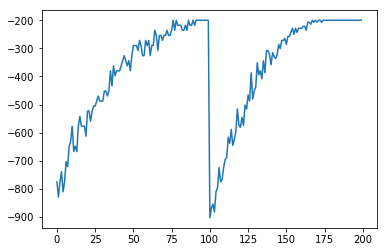

In [91]:
for step_num in [250, 300]:
    for epoch in tqdm(range(n_epochs)):
        print("Epoch %s:"%epoch)

        crossovered = [crossover(choice(pool), choice(pool)) 
                       for _ in range(n_crossovers)]
        mutated = [mutation(crossovered[choice(range(len(crossovered)))]) for _ in range(n_mutations)]
        assert type(crossovered) == type(mutated) == list

        pool = pool + crossovered + mutated
        pool_scores = [evaluate(policy, step_num) for policy in pool]
        selected_indices = np.argsort(pool_scores)[-pool_size:]
        pool = [pool[i] for i in selected_indices]
        pool_scores = [pool_scores[i] for i in selected_indices]

        print("best score:", pool_scores[-1])
        epoch_scores.append(pool_scores[-1])
    plt.plot(range(len(epoch_scores)), epoch_scores)
    first_best_policy = pool[-1]
    s = env.reset()
    total_reward = 0
    step_num = 0
    for ind in range(100):
        action = first_best_policy[s]
        s, reward, is_done, _ = env.step(action)
        total_reward += reward
        if (is_done):
            break
        step_num += 1 
    file = file.append(pd.Series({"epochs":n_epochs, "pool_size":pool_size, "cross":n_crossovers, "mut":n_mutations, 
                                  "score":pool_scores[-1], "isdone":is_done, "steps_num":step_num, "policy":pool[-1]}), 
                               ignore_index=True )
    file.head()
    file.to_csv("results.csv")

In [1]:
print("hello")

hello


Ссылка на фидбек по семинару: [link](https://docs.google.com/forms/d/e/1FAIpQLSf-08wFrEke6zKlysETYiqAjH5CRXtOKut5Q77Tr5rdVId7zA/)

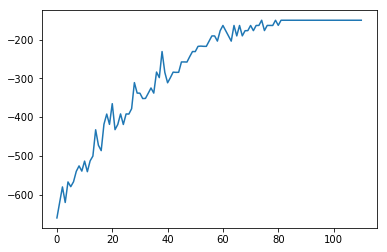

In [25]:
plt.plot(range(len(epoch_scores)), epoch_scores)
first_best_policy = pool[-1]

In [40]:
s = env.reset()
total_reward = 0
step_num = 0

In [41]:
for ind in range(100):
    action = first_best_policy[s]
    s, reward, is_done, _ = env.step(action)
    total_reward += reward
    if (is_done):
        break
    step_num += 1

In [42]:
print(is_done)

False
